In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics.pairwise import cosine_similarity
from scipy.stats import zscore

In [2]:
df=pd.read_csv('CC GENERAL.csv')

In [3]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [4]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [5]:
df.isna().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [6]:
df.dtypes

CUST_ID                              object
BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                         int64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
dtype: object

In [7]:
df['MINIMUM_PAYMENTS']=df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].mean())

In [8]:
s=df['CREDIT_LIMIT'].mode()
df['CREDIT_LIMIT']=df['CREDIT_LIMIT'].fillna(float(s))

In [9]:
df.isna().sum()
df.loc[df['CREDIT_LIMIT']=='Nan']
df['CREDIT_LIMIT'].isna().sum()

0

<AxesSubplot:>

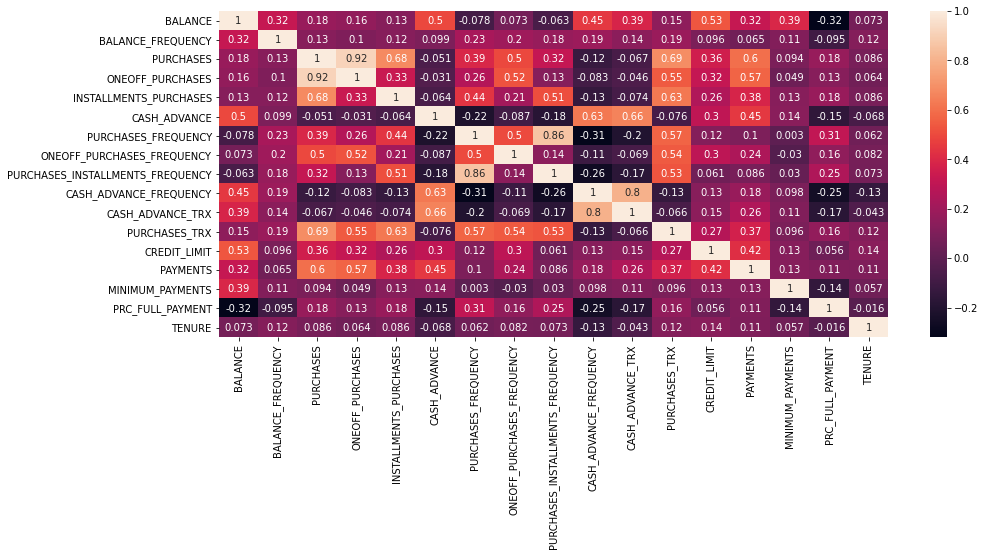

In [10]:
fig=plt.subplots(figsize=(15,6))
sns.heatmap(df.corr(),annot=True)

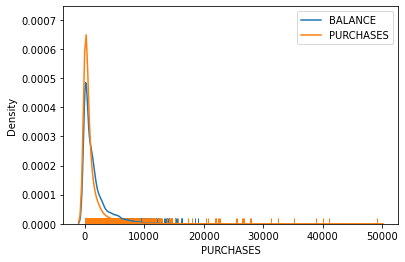

In [11]:
#fig,ax=plt.subplots(,3,figsize=(10,10))
sns.distplot(df['BALANCE'],hist=False,rug=True,label='BALANCE')
sns.distplot(df['PURCHASES'],hist=False,rug=True,label='PURCHASES')
plt.legend()

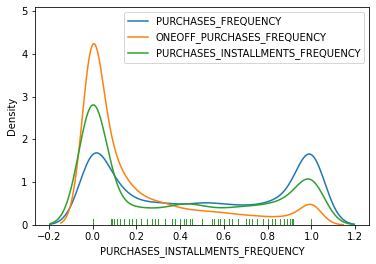

In [12]:
cols=['PURCHASES_FREQUENCY','ONEOFF_PURCHASES_FREQUENCY','PURCHASES_INSTALLMENTS_FREQUENCY']
for i in cols:
    sns.distplot(df[i],hist=False,rug=True,label=i)
plt.legend()

<AxesSubplot:xlabel='PAYMENTS', ylabel='CREDIT_LIMIT'>

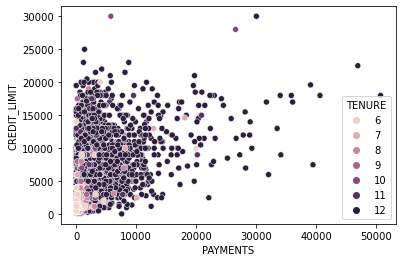

In [13]:
col=['CREDIT_LIMIT','PAYMENTS']
sns.scatterplot(x=col[1],y=col[0],data=df,hue='TENURE')

<AxesSubplot:xlabel='CASH_ADVANCE_FREQUENCY', ylabel='CASH_ADVANCE'>

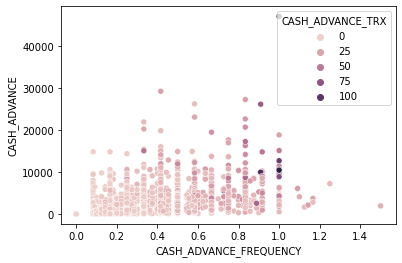

In [14]:
sns.scatterplot(y='CASH_ADVANCE',x='CASH_ADVANCE_FREQUENCY',data=df,hue='CASH_ADVANCE_TRX')

<AxesSubplot:xlabel='BALANCE', ylabel='PURCHASES'>

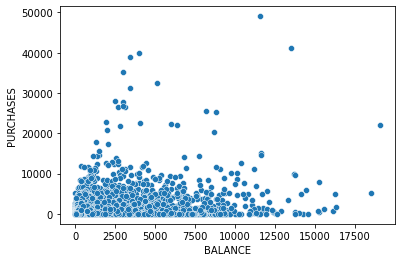

In [15]:
sns.scatterplot(x='BALANCE',y='PURCHASES',data=df)

<AxesSubplot:xlabel='PURCHASES', ylabel='PURCHASES_TRX'>

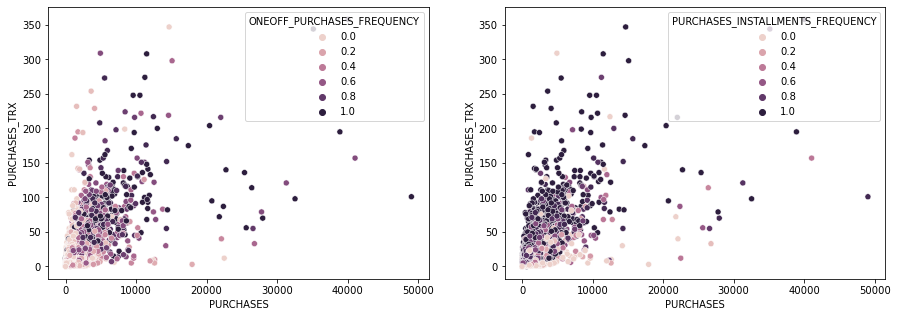

In [16]:
h=['ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES']
fig,ax=plt.subplots(1,2,figsize=(15,5))
sns.scatterplot(x='PURCHASES',y='PURCHASES_TRX',data=df,hue='ONEOFF_PURCHASES_FREQUENCY',ax=ax[0])
sns.scatterplot(x='PURCHASES',y='PURCHASES_TRX',data=df,hue='PURCHASES_INSTALLMENTS_FREQUENCY',ax=ax[1])


<AxesSubplot:xlabel='BALANCE', ylabel='PURCHASES_TRX'>

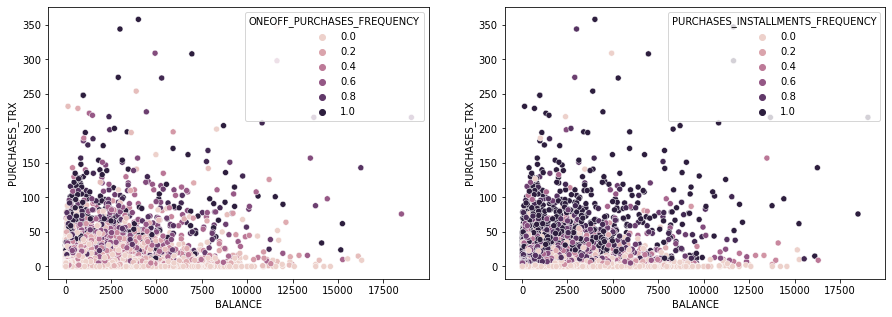

In [17]:
fig,ax=plt.subplots(1,2,figsize=(15,5))
sns.scatterplot(x='BALANCE',y='PURCHASES_TRX',data=df,hue='ONEOFF_PURCHASES_FREQUENCY',ax=ax[0])
sns.scatterplot(x='BALANCE',y='PURCHASES_TRX',data=df,hue='PURCHASES_INSTALLMENTS_FREQUENCY',ax=ax[1])

In [18]:
#sns.pairplot(df)

In [19]:
df.set_index('CUST_ID', inplace=True)
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
CUST_ID,,,,,,,,,,,,,,,,,
C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


ss=StandardScaler()
y=ss.fit_transform(df)
df2=pd.DataFrame(y,columns=['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],index=df.index)

In [20]:
df2=df.apply(zscore)

In [21]:
df2.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03
mean,4.195651e-16,1.209548e-14,-9.278518e-16,3.916048e-15,2.275424e-15,5.697020e-15,-3.716084e-16,2.021052e-15,2.353921e-16,5.856519e-16,-7.151821e-16,-3.570713e-15,6.739178e-15,-3.264056e-16,1.873114e-17,-2.199184e-15,1.556446e-14
std,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00
min,-7.516398e-01,-3.703271e+00,-4.695519e-01,-3.569340e-01,-4.545762e-01,-4.667856e-01,-1.221758e+00,-6.786608e-01,-9.169952e-01,-6.753489e-01,-4.760698e-01,-5.917959e-01,-1.221479e+00,-5.986883e-01,-3.708230e-01,-5.255510e-01,-4.122768e+00
25%,-6.900078e-01,4.904486e-02,-4.510006e-01,-3.569340e-01,-4.545762e-01,-4.667856e-01,-1.014125e+00,-6.786608e-01,-9.169952e-01,-6.753489e-01,-4.760698e-01,-5.515646e-01,-7.954727e-01,-4.662913e-01,-2.975162e-01,-5.255510e-01,3.606795e-01
50%,-3.320286e-01,5.180838e-01,-3.004541e-01,-3.340396e-01,-3.561562e-01,-4.667856e-01,2.404259e-02,-3.993193e-01,-4.976286e-01,-6.753489e-01,-4.760698e-01,-3.101767e-01,-4.106928e-01,-3.026846e-01,-2.268130e-01,-5.255510e-01,3.606795e-01
75%,2.352559e-01,5.180838e-01,5.004652e-02,-9.056763e-03,6.366321e-02,6.435242e-02,1.062211e+00,3.269728e-01,9.701506e-01,4.351492e-01,1.100739e-01,9.213645e-02,5.512570e-01,5.802976e-02,-4.390474e-16,-3.712234e-02,3.606795e-01
max,8.397489e+00,5.180838e-01,2.248351e+01,2.420107e+01,2.442689e+01,2.201112e+01,1.269843e+00,2.673451e+00,1.599199e+00,6.820521e+00,1.754785e+01,1.381101e+01,7.010063e+00,1.692228e+01,3.241509e+01,2.893453e+00,3.606795e-01


df3.isna().sum()

In [22]:
k=[]
k_test=df2.copy()
s_score=[]
for i in range(1,11):
    km=KMeans(n_clusters=i,init = 'k-means++')
    km.fit(k_test)
    k.append(km.inertia_)
    

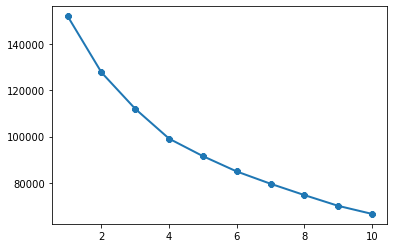

In [23]:
plt.plot(list(range(1,11)),k,linewidth = 2, marker = '8')

In [24]:
km=KMeans(n_clusters=5)
label=km.fit_predict(k_test)
silhouette_score(k_test, label)

0.19331926927516443

In [25]:
km=KMeans(n_clusters=6)
label=km.fit_predict(k_test)
silhouette_score(k_test, label)

0.20243357788357705

In [26]:
km=KMeans(n_clusters=4)
label=km.fit_predict(df2)
print(silhouette_score(df2, label))
df2['Group_label']=label
df['Group_label']=label
df_clusters=df.groupby(['Group_label'])
df_clusters.mean()

0.19760847094537623


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
Group_label,,,,,,,,,,,,,,,,,
0,1011.751528,0.789871,269.973466,209.853863,60.386625,595.759339,0.170146,0.086281,0.080578,0.114833,2.125503,2.903421,3277.327297,974.505090,586.301239,0.078001,11.446429
1,894.907458,0.934734,1236.178934,593.974874,642.478274,210.570626,0.885165,0.297070,0.711842,0.042573,0.790021,22.091773,4213.207678,1332.194205,650.167072,0.269258,11.594595
2,4602.462714,0.968415,501.896219,320.373681,181.607404,4520.724309,0.287731,0.138934,0.185516,0.484526,14.284641,7.661102,7546.957050,3481.145990,2008.251157,0.034859,11.387312
3,3551.153761,0.986879,7681.620098,5095.878826,2587.208264,653.638891,0.946418,0.739031,0.788060,0.071290,2.085575,89.359413,9696.943765,7288.739497,1976.815179,0.286707,11.951100


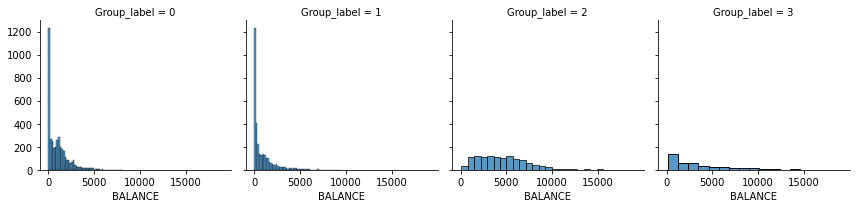

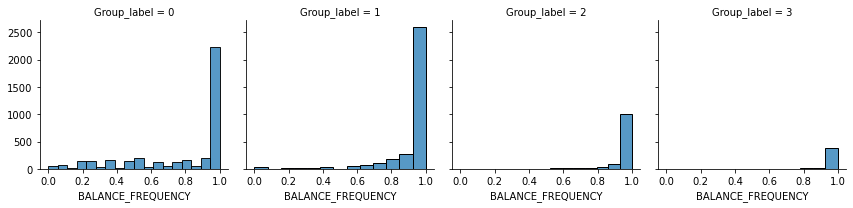

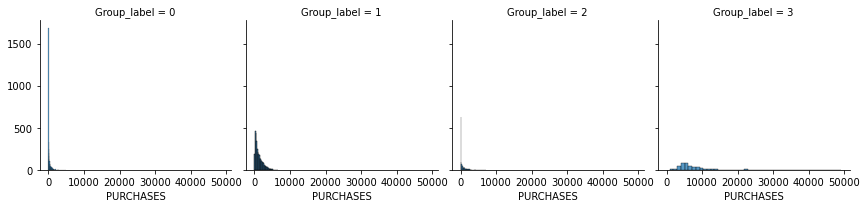

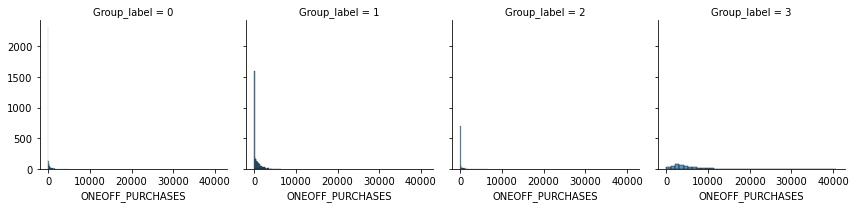

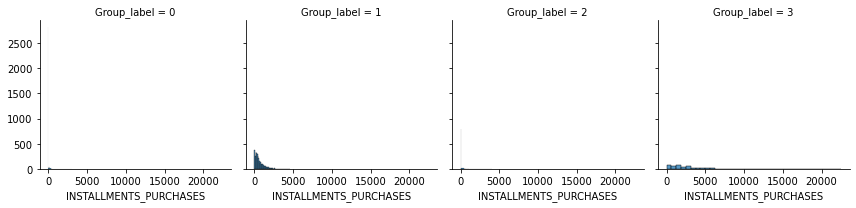

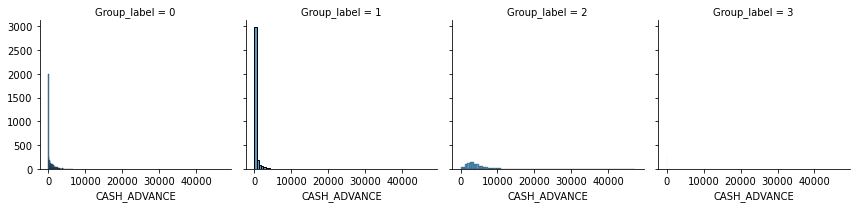

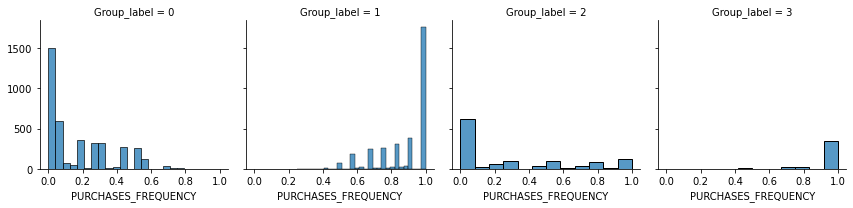

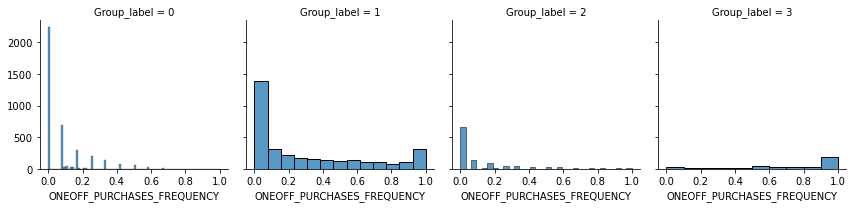

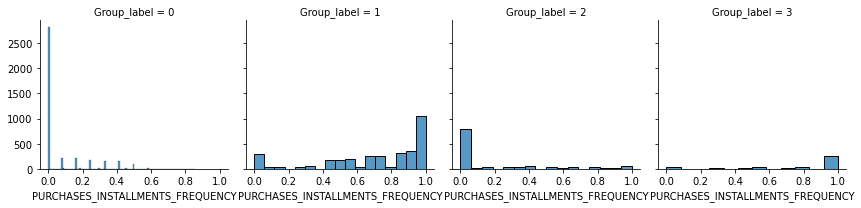

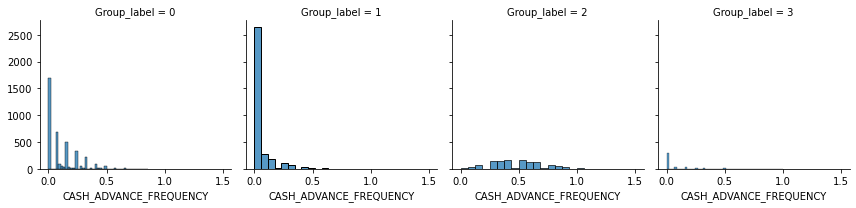

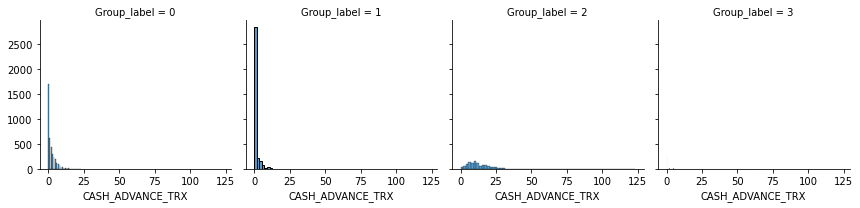

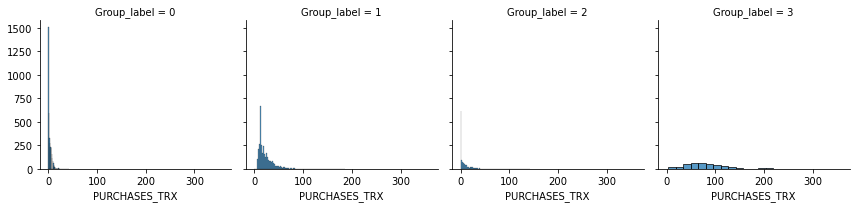

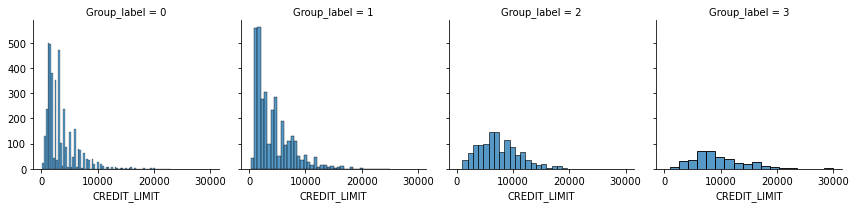

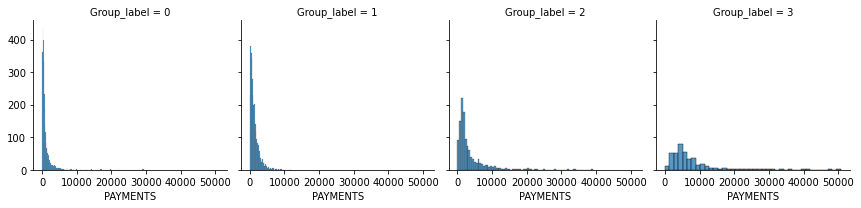

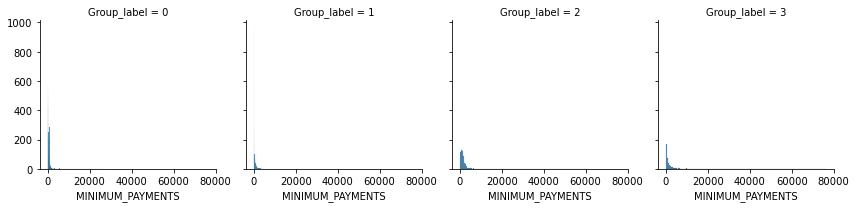

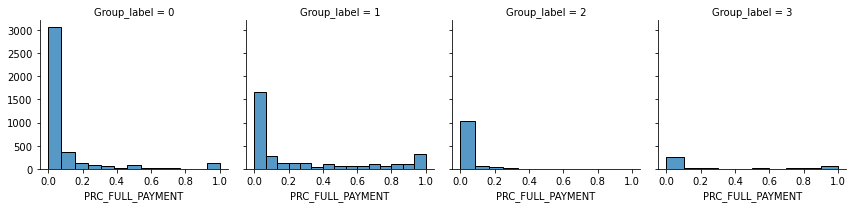

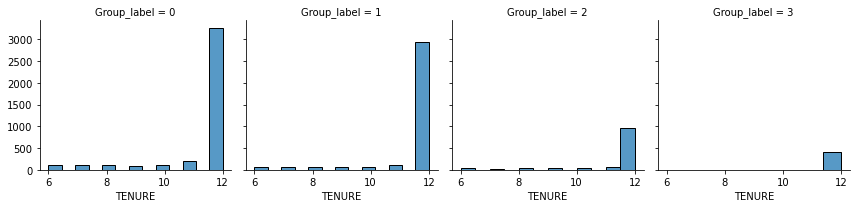

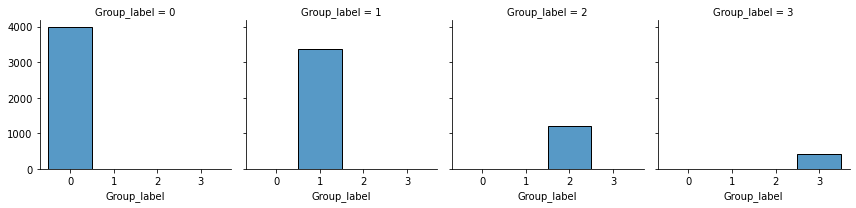

In [27]:
for c in df:
    g=sns.FacetGrid(df,col='Group_label')
    g.map_dataframe(sns.histplot,c)

In [28]:
pca=PCA(n_components=2)
X=pca.fit_transform(df2)
y=pca.fit(df2)
y.explained_variance_ratio_

array([0.28005246, 0.20038245])

In [29]:
pca_df=pd.DataFrame(data=X,columns=['pca1','pca2'])
pca_df=pd.concat([pca_df,pd.DataFrame({'Group_label':label})],axis=1)
pca_df.head()

,pca1,pca2,Group_label
0,-1.962994,-0.922740,0
1,-0.483309,2.803316,2
2,0.936461,-0.500807,1
3,-1.079012,0.026087,0
4,-1.842491,-0.559465,0


<AxesSubplot:xlabel='pca1', ylabel='pca2'>

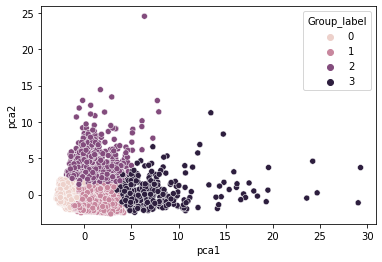

In [30]:
sns.scatterplot(data=pca_df,x='pca1',y='pca2',hue='Group_label')

After reading through the marketing strategies for credit card companies to better understand the several credit card attributes and their importance,these are the key takeaways:
Different ways credit card companies/Banks gain profit are:
1.Interest on due payments/cash advances
2.By charging merchants on number of credit card transactions 

From above conclusion, I have built 4 cluster model which can be used to drive different business objectives on different clusters
1. cluster 0:Money Savers: Is the cluster with least amount and frequency of purchases
2. cluster 1:Spenders: Is the cluster with highest amount of purchases of bothe type: onetime as well as installment based
3. cluster 2:People with installment purchases:Is the cluster with highest frequency of purchases made in installments
4. cluster 3:Cash in advance payments:Is the cluster with highest number of cash in advance type transactions with highest monthly minimum payment amount requirement and highest credit limit

Based on above cluster characteristics below business objectives can be derived :
1. cluster 0: This seems to be a group of money saver people prefering least transactions, this group can be encouraged to make more purchases by availing several offers for thei credit cards
2. cluster 1: As this cluster seems to be group of spenders, credit card purchases in wide product domains can be encouraged for the group
3. cluster 2: As this cluster seems to be group of people with installment purchases,can be targeted to make EMI based product purchases
4. cluster 4:  As this cluster seems to be group of people douing cash in advance payments, interest rate optimization can be done for this group, for interest profit margin optimization